# Student Analsis


In this notebook I present to you data taken out of a real highschool. In this dataset we have a total of 16 variables and a single class. Most of the data is categorical, this means it is divided into a certain ammount of pre-defined categories. There also a few columns that have numerical data in the form of integers. In this notebook we will try to extract some key features in order to better understand the dataset and as part of the field of 'Data Analysis'.

# Step 0: 
### Load the data into a pandas dataframe

How do you intend to do data analysis without loading the data????
# ?

In [5]:
# First, import the necessary libraries to carryout the analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("API_Edu_Data.csv")

## Step 1: 
### Print some elements from the dataset in order to take a quick look at the dataset

Understanding the data you are working with is very important

In [3]:
# Print 10 e random elements from the dataset.

df.head(10)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
5,F,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,42,30,13,70,Yes,Bad,Above-7,M
6,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,35,12,0,17,No,Bad,Above-7,L
7,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,50,10,15,22,Yes,Good,Under-7,M
8,F,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,12,21,16,50,Yes,Good,Under-7,M
9,F,KW,KuwaIT,MiddleSchool,G-07,B,IT,F,Father,70,80,25,70,Yes,Good,Under-7,M


## Step 2:
### Check for missing or null values

We should always check for missing values as part of getting familiarized with our data.


In [6]:
# check for null values

df.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

## Step 3:
### which is the column with the highest ammount of VARIABILITY?

Time to start extracting info.


In [72]:
# Check every column EXCEPT the one for the class and find out which one has the highest variability

# sigma = df.nunique()

sigma = df.std()

sigma

raisedhands          30.779223
VisITedResources     33.080007
AnnouncementsView    26.611244
Discussion           27.637735
dtype: float64

## Step 4:
### Find out for each variable their skewness and plot 5 of them.

Understanding the biases of data can always give us some key information


<AxesSubplot:>

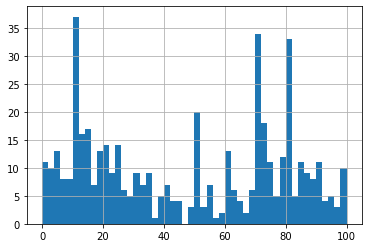

In [28]:
# Select 5 columns and find out their bias

df["raisedhands"].hist(bins=50)

<AxesSubplot:>

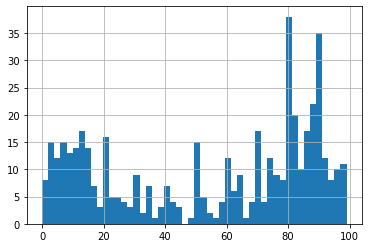

In [25]:
df["VisITedResources"].hist(bins=50)

<AxesSubplot:>

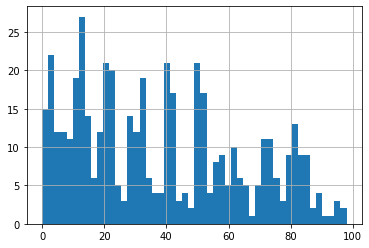

In [26]:
df["AnnouncementsView"].hist(bins=50)

<AxesSubplot:>

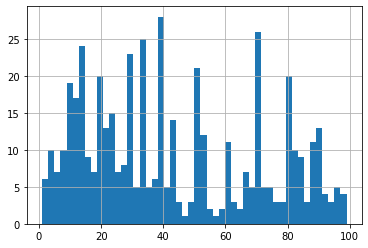

In [29]:
df["Discussion"].hist(bins=50)

<AxesSubplot:>

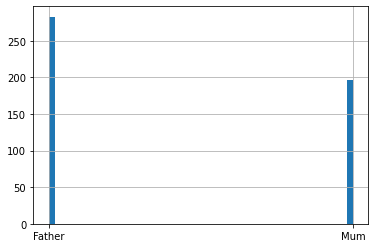

In [39]:
df["Relation"].hist(bins=50)

## Step 5:
### Find out for all the variables which is their correlation with the class

Sometimes we need to reduce the ammount of features we feed the model in order to make it more lighweight, so we either select the best ones or take out the most useless ones.

In [53]:
# Select the top 4 most correlated and put them in a different dataset

df.corr().unstack()

raisedhands        raisedhands          1.000000
                   VisITedResources     0.691572
                   AnnouncementsView    0.643918
                   Discussion           0.339386
VisITedResources   raisedhands          0.691572
                   VisITedResources     1.000000
                   AnnouncementsView    0.594500
                   Discussion           0.243292
AnnouncementsView  raisedhands          0.643918
                   VisITedResources     0.594500
                   AnnouncementsView    1.000000
                   Discussion           0.417290
Discussion         raisedhands          0.339386
                   VisITedResources     0.243292
                   AnnouncementsView    0.417290
                   Discussion           1.000000
dtype: float64

In [69]:
# Select the top 4 least correlated and create a new dataset without them

# ParentAnsweringSurvey
# ParentschoolSatisfaction
# StudentAbsenceDays
# Relation

0      Yes
1      Yes
2       No
3       No
4       No
      ... 
475     No
476     No
477     No
478     No
479     No
Name: ParentAnsweringSurvey, Length: 480, dtype: object

## Step 6:
### Visualize the correlation between the previously selected 4 most correlated variables with the class

Lets see if those are correlated too.


In [ ]:
# Plot the correlation among themself for the previous 4 variables.



## Step 7:
### For the previoys 4 variables plot them AGAINST the class


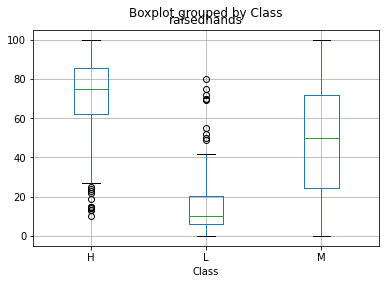

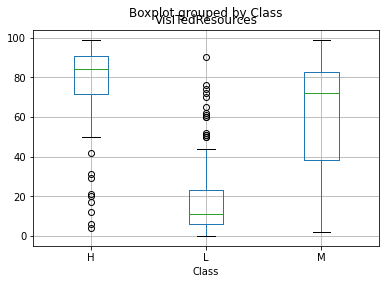

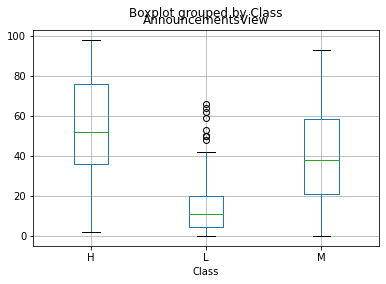

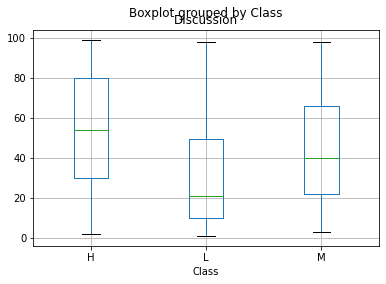

In [85]:
# make 4 plot where you plot each of the variables with the class

# raisedhands", "VisITedResources", "AnnouncementsView", "Discussion"].value_counts()

a = df.boxplot(column="raisedhands", by="Class")
b = df.boxplot(column="VisITedResources", by="Class")
c = df.boxplot(column="AnnouncementsView", by="Class")
d = df.boxplot(column="Discussion", by="Class")

## Step 8:
### Probability time, if I know a student had less than 7 absent days what is the probability of him being classified as L

In [ ]:
# compute the probability

## Step 8:
### Probability time, if I know a student had less than 7 absent days what is the probability of him being classified as m or higher, using the previous calculation

In [ ]:
# Looking at step seven extrapolate from it the probability of a student being classified as M or H

## Step 9:
### Probability time, knowing a student was classified as H, what is the probability of him having raised the hand more than 10 times

In [ ]:
# Bayes time

## Step 10:
### Free time, if I was the principal of the school what plots and probabilities would you show me to help me accept only M and H students.